In [8]:
import numpy as np
import pickle

from visualize import WeylChamber

import matplotlib.pyplot as plt

from synthesis import check_synthesis_weyl, swap_in_3

In [3]:
# The Cartan coordinates of some common gates
can_sqrtSWAP = np.array([1/4,1/4,1/4])
can_sqrtSWAPd = np.array([3/4,1/4,1/4])
can_B = np.array([1/2,1/4,0])
can_SWAP = np.array([1/2,1/2,1/2])
can_CZ = np.array([1/2,0,0])
can_iSWAP = np.array([1/2,1/2,0])

In [6]:
# check whether gate A can be decomposed into 2 layers by gate B and gate C
weylA = can_SWAP
weylB = can_CZ
weylC = can_iSWAP
check_synthesis_weyl(weylB,weylC,weylA)

True

In [7]:
# check whether gate A can be decomposed into 2 layers by gate B and gate C
weylA = can_SWAP
weylB = can_CZ
weylC = can_CZ
check_synthesis_weyl(weylB,weylC,weylA)

False

In [10]:
# check whether a 2Q gate can synthesize SWAP in 3 layers
weylG = can_CZ
swap_in_3(weylG,tol=1e-8)

True

In [11]:
# Sample some points in the interior of the Weyl chamber 
# then check whether they can synthesize SWAP in 3 layers
# the gates that get SWAP in 3 layers, interior 3D
v1 = np.array([1/2,1/2,1/2]) #SWAP
v2 = np.array([1,0,0]) # other end of I
v3 = np.array([1/2,1/2,0]) #iSWAP

sampling_1d = 40 #how many points to sample along each dimenstion
good_gates = [] #store gates that can get us SWAP in 3 steps
bad_gates = []

for i in range(sampling_1d):
    for j in range(sampling_1d-i):
        for k in range(sampling_1d-i-j):
            weyl = i/sampling_1d*v1 + j/sampling_1d*v2 + k/sampling_1d*v3
            success = swap_in_3(weyl,tol=1e-8)
            if success:
                good_gates.append(weyl)
            else:
                bad_gates.append(weyl)

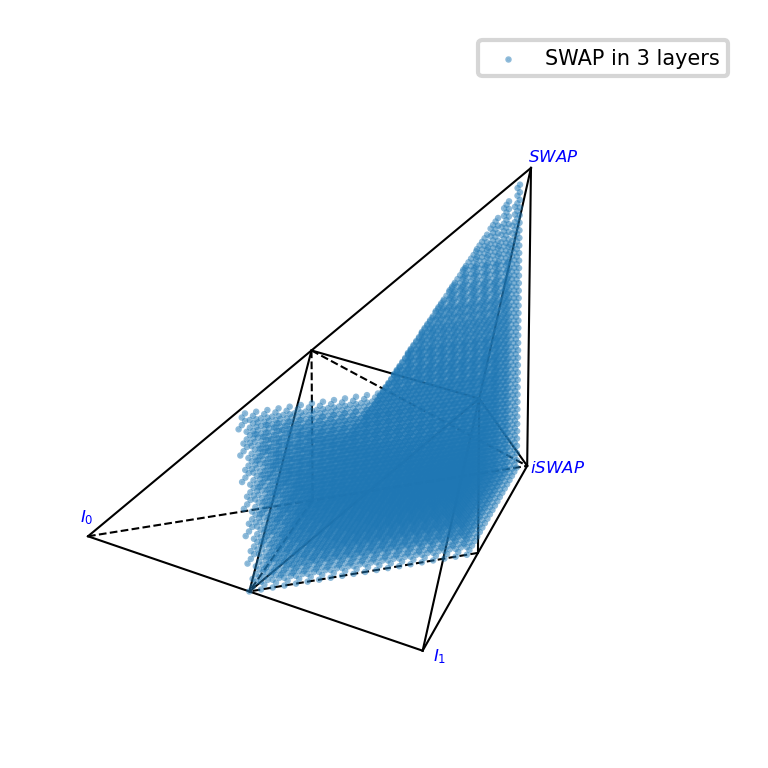

In [12]:
# plot the points that are able to get SWAP in 3 layers
w = WeylChamber()
line_width = 0.3
w.add_point(*zip(*good_gates), scatter_index=0, alpha=0.5, s=line_width, label='SWAP in 3 layers')
w.textmode = 1
w.plot()
plt.legend(fontsize=5)
plt.show()

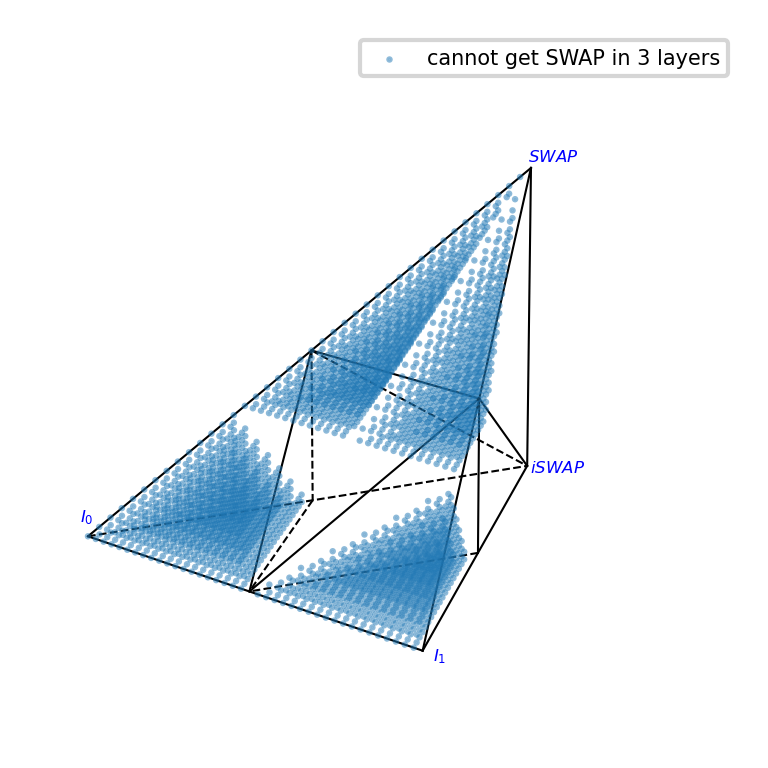

In [13]:
# plot the points that are NOT able to get SWAP in 3 layers
w = WeylChamber()
line_width = 0.3
w.add_point(*zip(*bad_gates), scatter_index=0, alpha=0.5, s=line_width, label='cannot get SWAP in 3 layers')
w.textmode = 1
w.plot()
plt.legend(fontsize=5)
plt.show()